In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import random

In [2]:
seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
dataset = pd.read_csv('AppleStore.csv')
dataset

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [3]:
dataset.drop(['track_name'],axis = 1,inplace=True)
dataset.drop(['ver'],axis = 1,inplace=True)
dataset.drop(['Unnamed: 0'],axis = 1,inplace=True)
dataset.drop(['id'],axis = 1,inplace=True)
dataset

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,USD,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
1,158578688,USD,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1
2,100524032,USD,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1
3,128512000,USD,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1
4,92774400,USD,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,USD,0.00,142,75,4.5,4.5,4+,Games,38,5,1,1
7193,120760320,USD,0.00,30,30,4.5,4.5,4+,Games,38,0,1,1
7194,111322112,USD,1.99,15,0,4.5,0.0,9+,Utilities,37,1,1,1
7195,97235968,USD,0.00,85,32,4.5,4.5,12+,Games,38,0,2,1


In [4]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
LE = LabelEncoder()
dataset['prime_genre']    = LE.fit_transform(dataset['prime_genre'])
dataset['currency'] = LE.fit_transform(dataset['currency'])
dataset['cont_rating'] = dataset['cont_rating'].replace('4+',4)
dataset['cont_rating'] = dataset['cont_rating'].replace('12+',12)
dataset['cont_rating'] = dataset['cont_rating'].replace('9+',9)
dataset['cont_rating'] = dataset['cont_rating'].replace('17+',17)
dataset

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,0,3.99,21292,26,4.0,4.5,4,7,38,5,10,1
1,158578688,0,0.00,161065,26,4.0,3.5,4,15,37,5,23,1
2,100524032,0,0.00,188583,2822,3.5,4.5,4,22,37,5,3,1
3,128512000,0,0.00,262241,649,4.0,4.5,12,17,37,5,9,1
4,92774400,0,0.00,985920,5320,4.5,5.0,4,16,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0,0.00,142,75,4.5,4.5,4,7,38,5,1,1
7193,120760320,0,0.00,30,30,4.5,4.5,4,7,38,0,1,1
7194,111322112,0,1.99,15,0,4.5,0.0,9,21,37,1,1,1
7195,97235968,0,0.00,85,32,4.5,4.5,12,7,38,0,2,1


In [5]:
x = dataset.iloc [:,1:-1].values
X= pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,3.99,21292.0,26.0,4.0,4.5,4.0,7.0,38.0,5.0,10.0
1,0.0,0.00,161065.0,26.0,4.0,3.5,4.0,15.0,37.0,5.0,23.0
2,0.0,0.00,188583.0,2822.0,3.5,4.5,4.0,22.0,37.0,5.0,3.0
3,0.0,0.00,262241.0,649.0,4.0,4.5,12.0,17.0,37.0,5.0,9.0
4,0.0,0.00,985920.0,5320.0,4.5,5.0,4.0,16.0,37.0,5.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...
7192,0.0,0.00,142.0,75.0,4.5,4.5,4.0,7.0,38.0,5.0,1.0
7193,0.0,0.00,30.0,30.0,4.5,4.5,4.0,7.0,38.0,0.0,1.0
7194,0.0,1.99,15.0,0.0,4.5,0.0,9.0,21.0,37.0,1.0,1.0
7195,0.0,0.00,85.0,32.0,4.5,4.5,12.0,7.0,38.0,0.0,2.0


In [6]:
SC=StandardScaler()
x[:,:] = SC.fit_transform(x[:,:])
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.388126,0.110902,-0.110805,0.311656,0.688921,-0.714548,-0.324940,0.170753,0.651051,0.576471
1,0.0,-0.295960,1.956477,-0.110805,0.311656,0.136202,-0.714548,1.319353,-0.096808,0.651051,2.218083
2,0.0,-0.295960,2.319827,0.602428,-0.017759,0.688921,-0.714548,2.758109,-0.096808,0.651051,-0.307474
3,0.0,-0.295960,3.292413,0.048117,0.311656,0.688921,1.133563,1.730426,-0.096808,0.651051,0.450193
4,0.0,-0.295960,12.847931,1.239643,0.641071,0.965281,-0.714548,1.524889,-0.096808,0.651051,4.996197
...,...,...,...,...,...,...,...,...,...,...,...
7192,0.0,-0.295960,-0.168364,-0.098305,0.641071,0.688921,-0.714548,-0.324940,0.170753,0.651051,-0.560030
7193,0.0,-0.295960,-0.169843,-0.109784,0.641071,0.688921,-0.714548,-0.324940,0.170753,-1.866742,-0.560030
7194,0.0,0.045225,-0.170041,-0.117437,0.641071,-1.798315,0.440522,2.552573,-0.096808,-1.363183,-0.560030
7195,0.0,-0.295960,-0.169117,-0.109274,0.641071,0.688921,1.133563,-0.324940,0.170753,-1.866742,-0.433752


In [7]:
y = dataset.iloc [:,-1].values
Y= pd.DataFrame(y)
Y

,0
0,1
1,1
2,1
3,1
4,1
...,...
7192,1
7193,1
7194,1
7195,1


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 ,random_state = 0)

In [9]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
r=ann.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=32 , epochs = 50)

Epoch 1/50
180/180 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8890 - val_loss: 0.1667 - val_accuracy: 0.9937
Epoch 2/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9929 - val_loss: 0.0525 - val_accuracy: 0.9937
Epoch 3/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9929 - val_loss: 0.0414 - val_accuracy: 0.9937
Epoch 4/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9929 - val_loss: 0.0389 - val_accuracy: 0.9937
Epoch 5/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9929 - val_loss: 0.0376 - val_accuracy: 0.9937
Epoch 6/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9929 - val_loss: 0.0366 - val_accuracy: 0.9937
Epoch 7/50
180/180 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9929 - val_loss: 0.0360 - val_accuracy: 0.9937
Epoch 

In [11]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   1    8]
 [   0 1431]]


0.9944444444444445

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [13]:
y_pred = ann.predict(x_test).ravel()

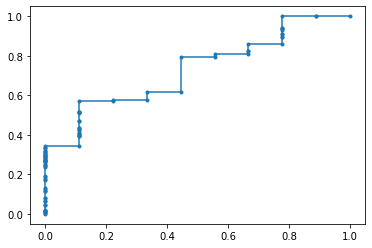

In [14]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

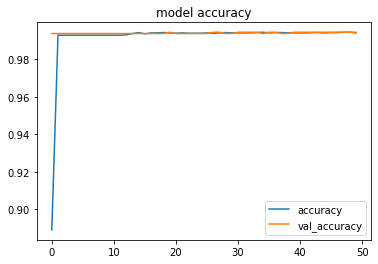

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

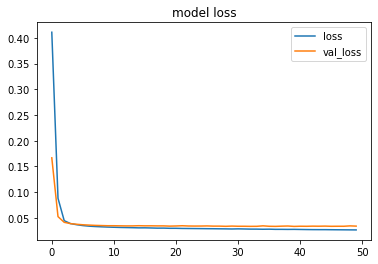

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.legend()
plt.show()